In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [4]:
x,y=sklearn.datasets.make_moons(200,noise=0.20)
x

array([[ 1.92546913, -0.39713385],
       [ 0.25608256, -0.7988518 ],
       [ 0.5424484 ,  0.63053679],
       [ 1.8645971 , -0.21956184],
       [-0.48832603,  0.10479751],
       [-0.55948256,  1.20738746],
       [-0.61563224,  0.44379811],
       [ 1.39470689, -0.6190713 ],
       [-0.44415745,  0.83430676],
       [ 0.05237221,  1.1034656 ],
       [ 0.58400426, -0.65938878],
       [ 0.5066586 , -0.58617192],
       [ 0.22152002,  0.82346047],
       [ 2.11785083, -0.20584676],
       [ 0.4590693 , -0.16222299],
       [ 0.60301705,  0.99942857],
       [ 1.76879776, -0.39224266],
       [ 0.62132481,  0.47711396],
       [-0.41483608,  0.70074236],
       [ 1.26633848, -0.41817536],
       [ 0.68830599,  0.63590243],
       [ 0.34325311, -0.49255049],
       [ 0.11643722,  0.33911106],
       [-0.90296229,  0.17800615],
       [ 2.01431461,  0.2246209 ],
       [ 0.58019262,  0.52447758],
       [ 0.62224991,  0.94533141],
       [ 1.76524486,  0.36068495],
       [-0.78210174,

In [5]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0], dtype=int64)

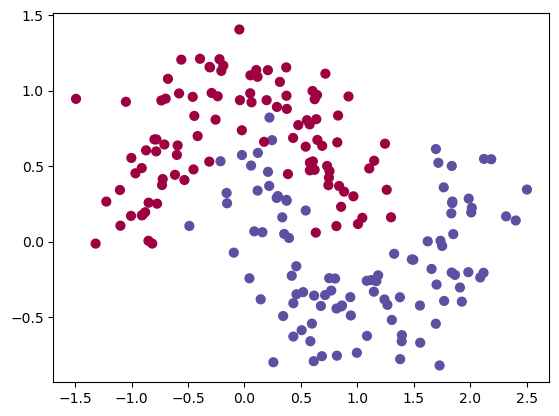

In [6]:
plt.scatter(x[:,0],x[:,1],s=40,c=y,cmap=plt.cm.Spectral)
plt.show()

In [7]:
x=torch.FloatTensor(x)
y=torch.LongTensor(y)
x

tensor([[ 1.9255, -0.3971],
        [ 0.2561, -0.7989],
        [ 0.5424,  0.6305],
        [ 1.8646, -0.2196],
        [-0.4883,  0.1048],
        [-0.5595,  1.2074],
        [-0.6156,  0.4438],
        [ 1.3947, -0.6191],
        [-0.4442,  0.8343],
        [ 0.0524,  1.1035],
        [ 0.5840, -0.6594],
        [ 0.5067, -0.5862],
        [ 0.2215,  0.8235],
        [ 2.1179, -0.2058],
        [ 0.4591, -0.1622],
        [ 0.6030,  0.9994],
        [ 1.7688, -0.3922],
        [ 0.6213,  0.4771],
        [-0.4148,  0.7007],
        [ 1.2663, -0.4182],
        [ 0.6883,  0.6359],
        [ 0.3433, -0.4926],
        [ 0.1164,  0.3391],
        [-0.9030,  0.1780],
        [ 2.0143,  0.2246],
        [ 0.5802,  0.5245],
        [ 0.6222,  0.9453],
        [ 1.7652,  0.3607],
        [-0.7821,  0.5992],
        [ 0.1046,  1.1384],
        [ 0.7686, -0.3235],
        [-0.7096,  0.6449],
        [ 0.3698,  1.1560],
        [-0.8487,  0.2590],
        [ 2.4033,  0.1410],
        [ 0.5426,  0

In [8]:
y

tensor([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 0])

# Build NN 

In [11]:
class FeedForward(torch.nn.Module):
    def __init__(self,input_neurons,hidden_neurons,output_neurons):
        super(FeedForward,self).__init__()
        self.hidden=nn.Linear(input_neurons,hidden_neurons)
        self.out=nn.Linear(hidden_neurons,output_neurons)
    def forward(self, x):
        x=self.hidden(x)
        x=F.relu(x)
        x=self.out(x)
        return x

In [12]:
network = FeedForward(input_neurons=2,hidden_neurons=50,output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(),lr=0.02)
loss_function = torch.nn.CrossEntropyLoss()

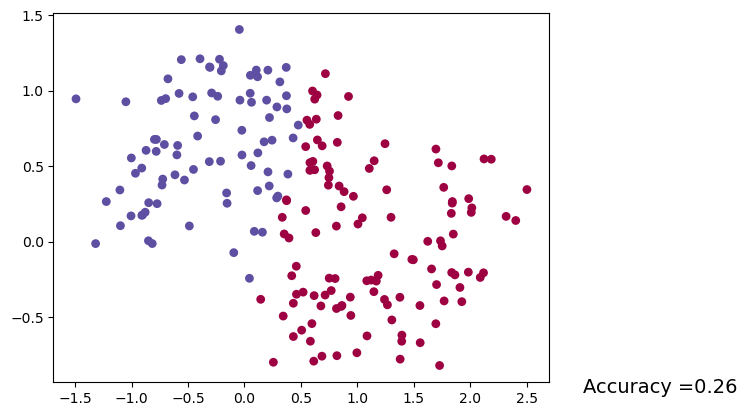

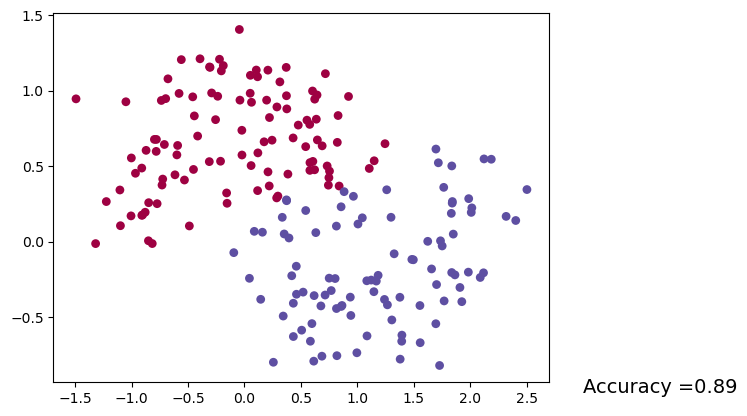

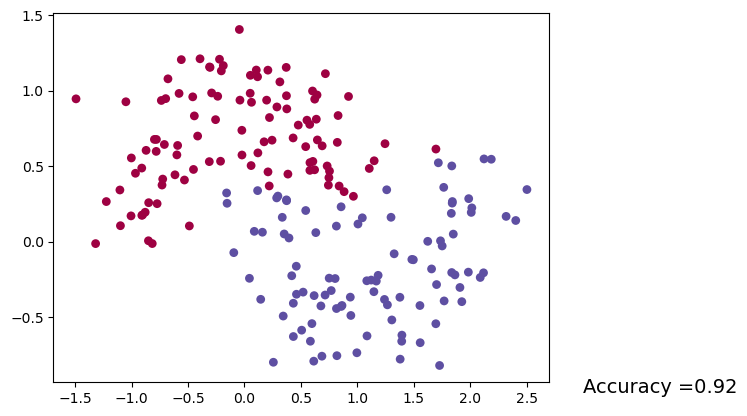

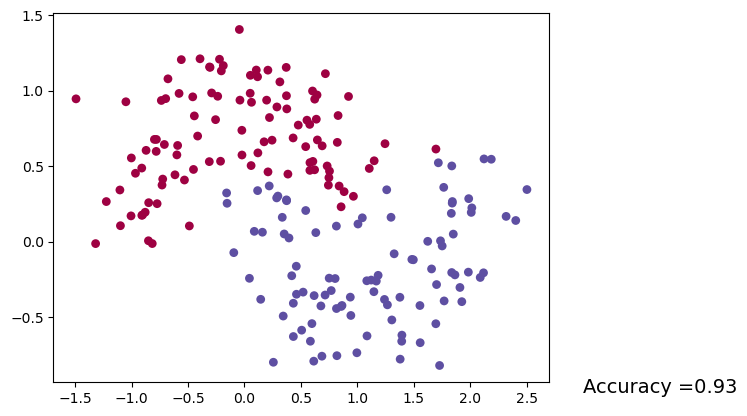

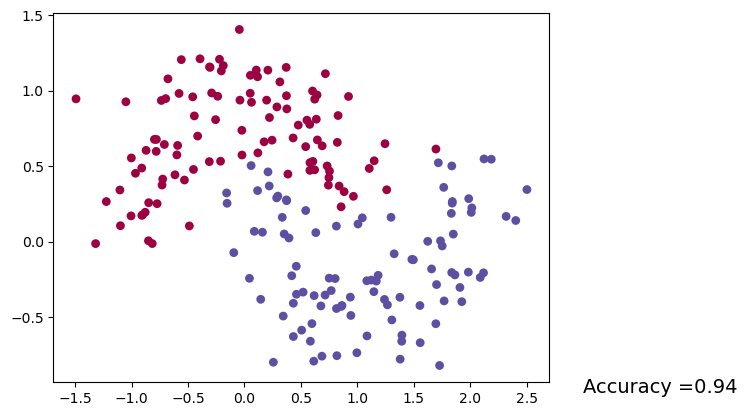

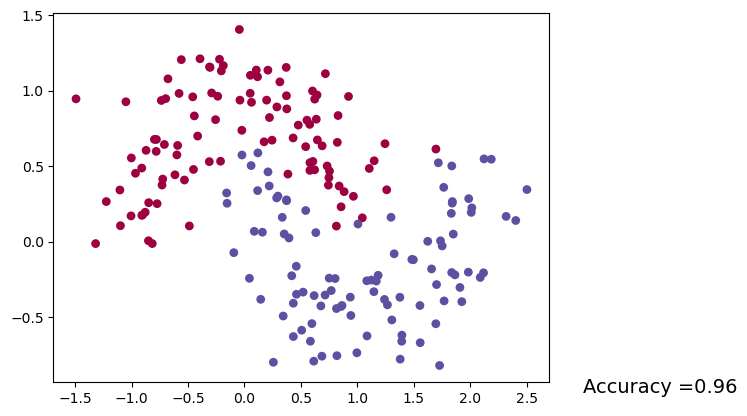

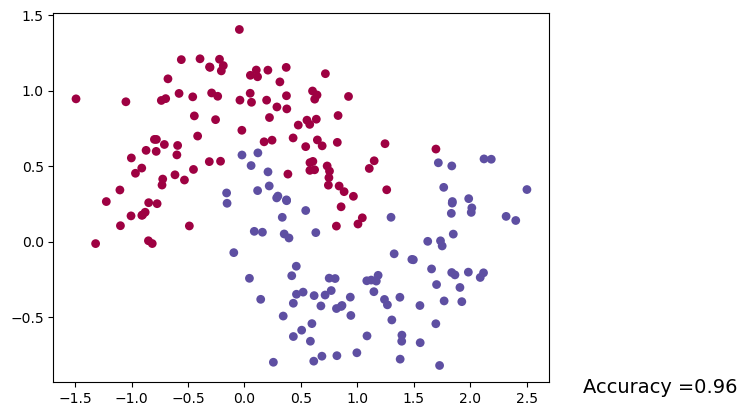

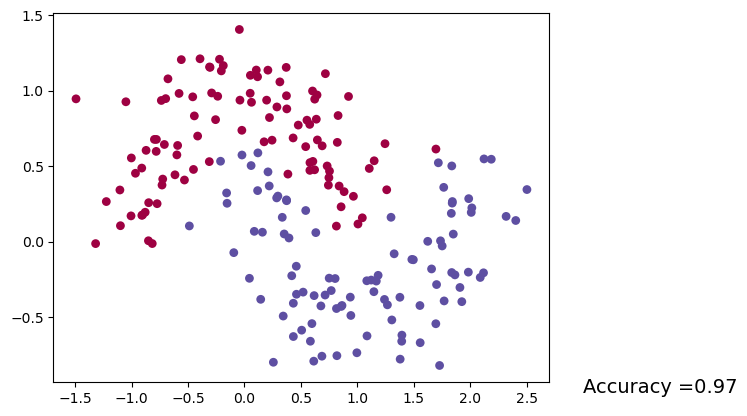

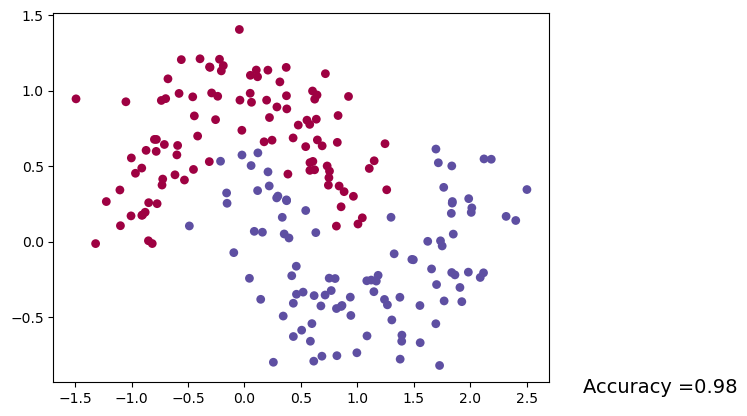

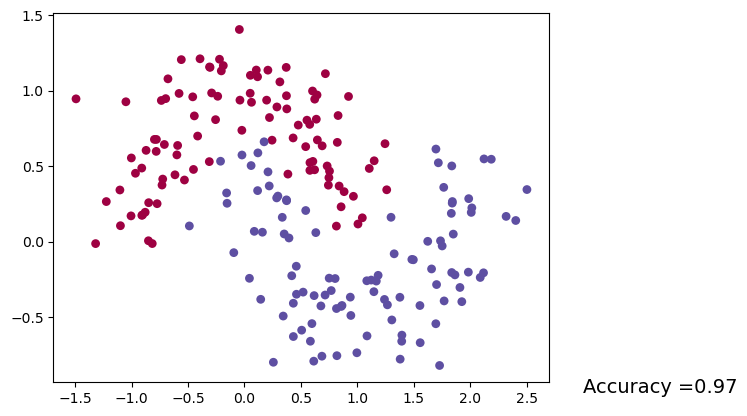

In [14]:
plt.ion()
for epoch in range(10000):
    out=network(x)
    loss=loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        #show learning process up until now
        max_value,prediciton = torch.max(out,1)
        predicted_y = prediciton.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],s=40,c=predicted_y,cmap=plt.cm.Spectral, lw=0)
        accuracy=(predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy ={:.2f}'.format(accuracy),fontdict = {'size':14})
        plt.pause(0.1)

plt.ioff()
plt.show()